# Decompositon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
np.random.seed(42)

In [3]:
time = np.arange(1, 121)

In [10]:
trend = time * 0.1
seasonality = 5 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(0, 1, len(time))

In [ ]:
additive_ts       = trend + seasonality + noise
multiplicative_ts = abs(trend * (1 + 0.5 * np.sin(2 * np.pi * time / 12)) + noise)

In [17]:
dates = pd.date_range(start = '2010-01-01',
                      periods = len(time),
                      freq = 'M')

/var/folders/07/4bdpdy9j169f0hzmsrdr14000wjdps/T/ipykernel_5911/404027094.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = '2010-01-01',


In [18]:
additive_df       = pd.DataFrame({'value': additive_ts},       index = dates)
multiplicative_df = pd.DataFrame({'value': multiplicative_ts}, index = dates)

In [19]:
decomposed_additive       = seasonal_decompose(additive_df['value'],       model = 'additive')
decomposed_multiplicative = seasonal_decompose(multiplicative_df['value'], model = 'multiplicative')

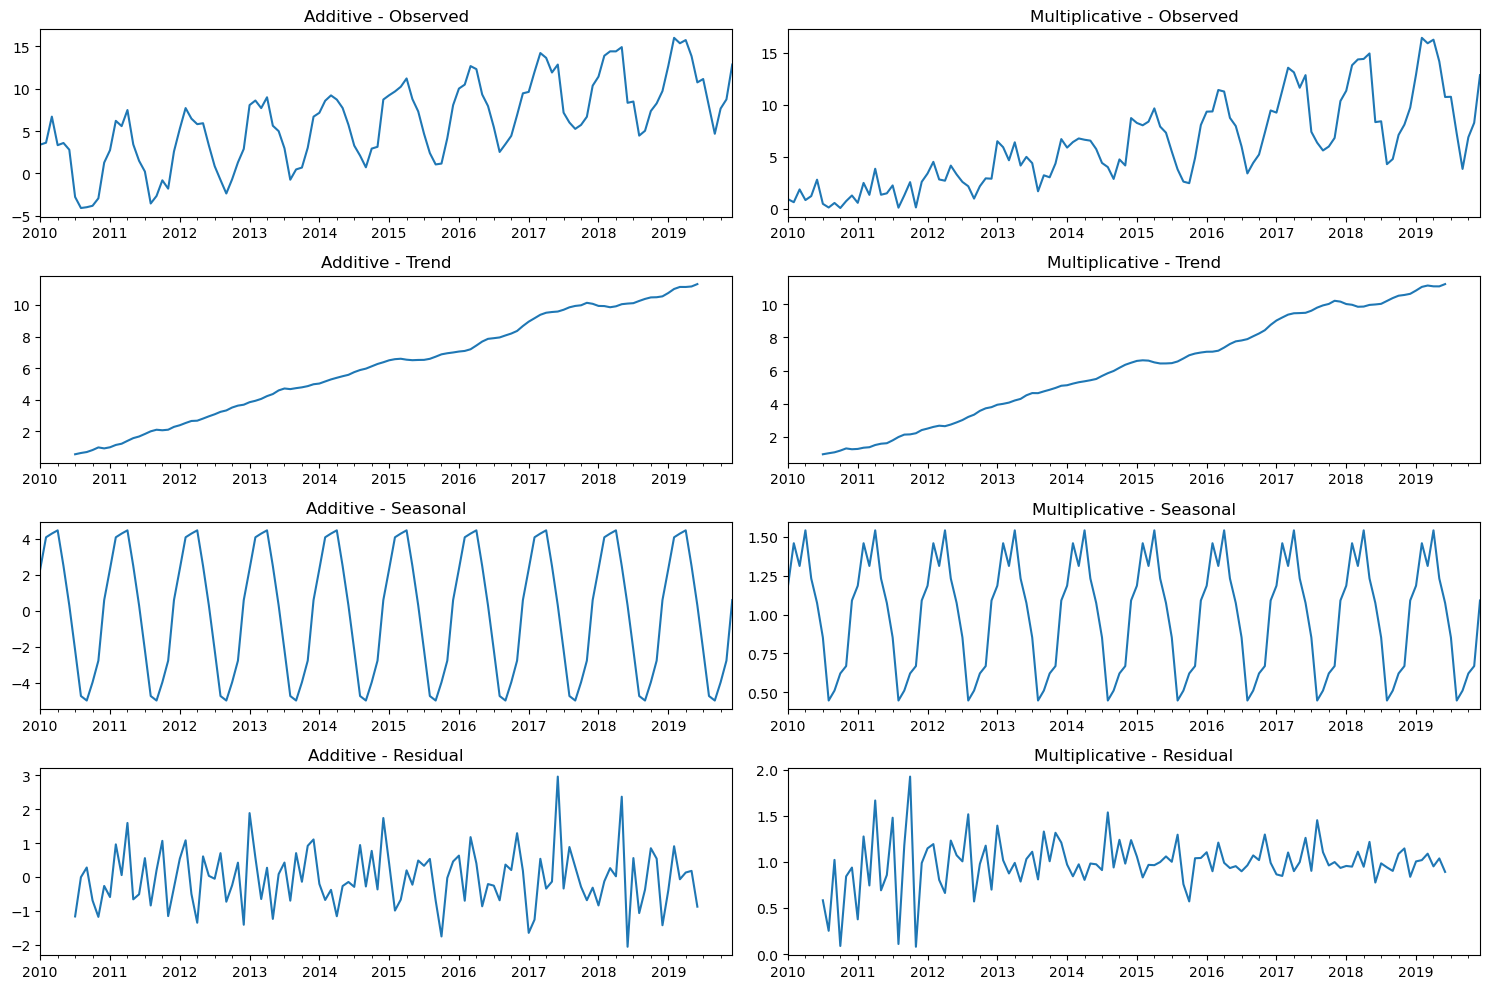

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (15, 10))

decomposed_additive.observed.plot(ax = axes[0, 0], title = 'Additive - Observed')
decomposed_additive.trend    .plot(ax = axes[1, 0], title = 'Additive - Trend')
decomposed_additive.seasonal.plot(ax = axes[2, 0], title = 'Additive - Seasonal')
decomposed_additive.resid   .plot(ax = axes[3, 0], title = 'Additive - Residual')

decomposed_multiplicative.observed.plot(ax = axes[0, 1], title = 'Multiplicative - Observed')
decomposed_multiplicative.trend   .plot(ax = axes[1, 1], title = 'Multiplicative - Trend')
decomposed_multiplicative.seasonal.plot(ax = axes[2, 1], title = 'Multiplicative - Seasonal')
decomposed_multiplicative.resid   .plot(ax = axes[3, 1], title = 'Multiplicative - Residual')

plt.tight_layout()